### importing all libraries

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
data = pd.read_csv("iris.csv")
df=pd.DataFrame(data)

In [227]:
df.shape

(149, 5)

In [228]:
df.size

745

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [230]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [231]:
data.columns = ['sepal length','sepal width', 'petal length','petal width','p_class']

In [232]:
df.head()

,sepal length,sepal width,petal length,petal width,p_class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [233]:
df.tail()

,sepal length,sepal width,petal length,petal width,p_class
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [234]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [235]:
df.isnull()

,sepal length,sepal width,petal length,petal width,p_class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False


In [236]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
p_class         0
dtype: int64

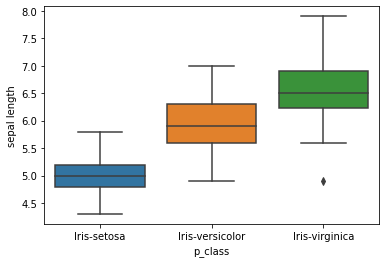

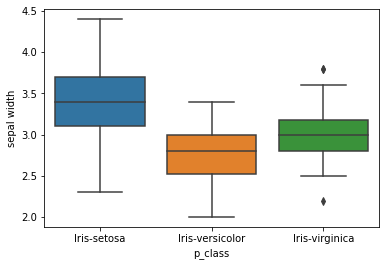

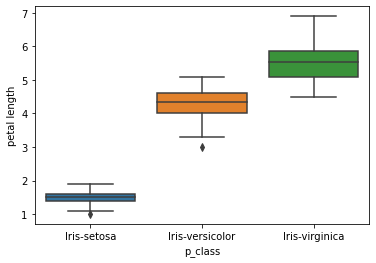

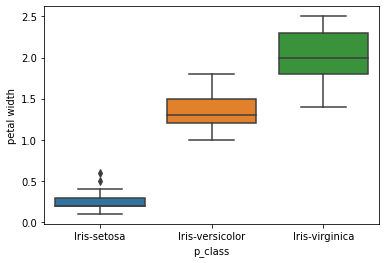

In [237]:
for i in range(4):
    plt.figure()
    sns.boxplot(data=df,y=df.columns[i],x=df["p_class"])

In [238]:
for column in df.columns[0:-1]:
    for s in df["p_class"].unique():
        s_type = df[df["p_class"] == s]
        Selected_column = s_type[column]
        Q1 = Selected_column.quantile(0.25)
        Q3 = Selected_column.quantile(0.75)

        IQR = Q3 - Q1
        lower_lmt = Q1 - (1.5*IQR)
        upper_lmt = Q3 + (1.5 * IQR)
        outliers = Selected_column[((Selected_column > upper_lmt) | (
            Selected_column < lower_lmt))].index
        df.drop(index=outliers, inplace=True)  
        print(column, s, len(outliers))

sepal length Iris-setosa 0
sepal length Iris-versicolor 0
sepal length Iris-virginica 1
sepal width Iris-setosa 0
sepal width Iris-versicolor 0
sepal width Iris-virginica 0
petal length Iris-setosa 1
petal length Iris-versicolor 1
petal length Iris-virginica 0
petal width Iris-setosa 2
petal width Iris-versicolor 0
petal width Iris-virginica 0


In [239]:
# Split the dataset 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(columns=['p_class'])

## Scaling the data
X = scaler.fit_transform(X)
Y = df.p_class

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=4)

In [241]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [242]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [243]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype='<U15')

In [244]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9655172413793104


array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  5]])

<AxesSubplot:>

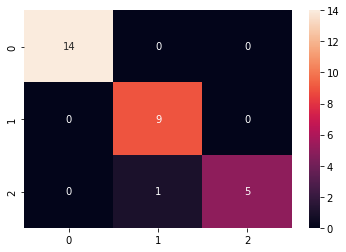

In [245]:
import seaborn as sns

sns.heatmap(cm, annot=True)

In [246]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)


In [247]:
from sklearn.metrics import classification_report
m=classification_report(y_test, y_pred,output_dict=True)
error_rate=1-m['weighted avg']['precision']
precision=m['weighted avg']['precision']
recall=m['weighted avg']['recall']


In [248]:
print("Accuracy: ",accuracy)
print("Error rate: ",error_rate)
print("precision: ",precision)
print("recall: ",recall)

Accuracy:  0.9655172413793104
Error rate:  0.03103448275862064
precision:  0.9689655172413794
recall:  0.9655172413793104
